In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Datasets/ushape.csv')

In [4]:
df.head()

,X1,X2,Y
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

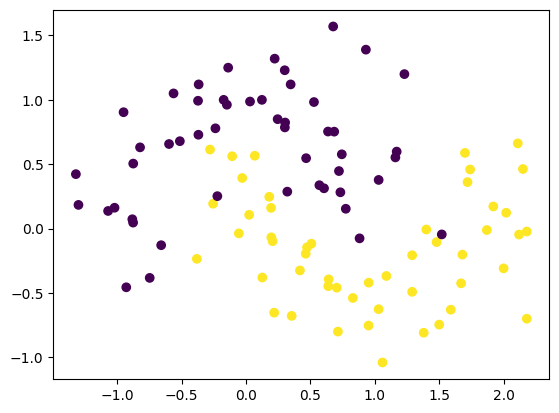

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

### Linear Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [8]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

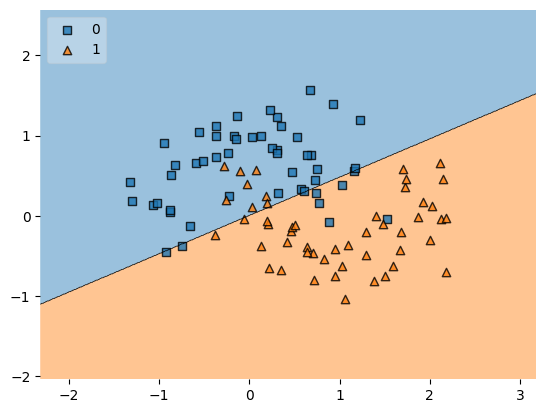

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [10]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

### Polynomial Logistic Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
X_trf = poly.fit_transform(X)

In [18]:
print(X[0])
print(X_trf[0])

[0.0316 0.987 ]
[3.16000000e-02 9.87000000e-01 9.98560000e-04 3.11892000e-02
 9.74169000e-01 3.15544960e-05 9.85578720e-04 3.07837404e-02
 9.61504803e-01 9.97122074e-07 3.11442876e-05 9.72766197e-04
 3.03835518e-02 9.49005241e-01]


In [22]:
clf1 = LogisticRegression()
cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10)

array([0.9, 0.8, 0.8, 0.8, 1. , 0.8, 0.9, 1. , 1. , 1. ])

In [23]:
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [24]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

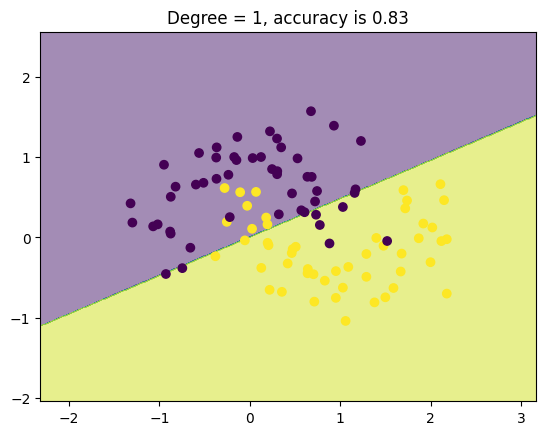

In [25]:
plot_decision_boundary(X,y)

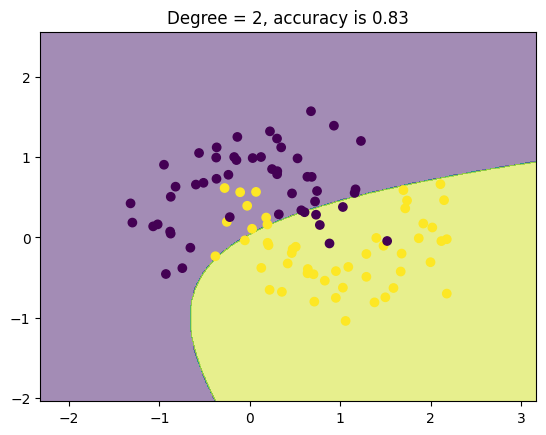

In [26]:
plot_decision_boundary(X,y,degree=2)

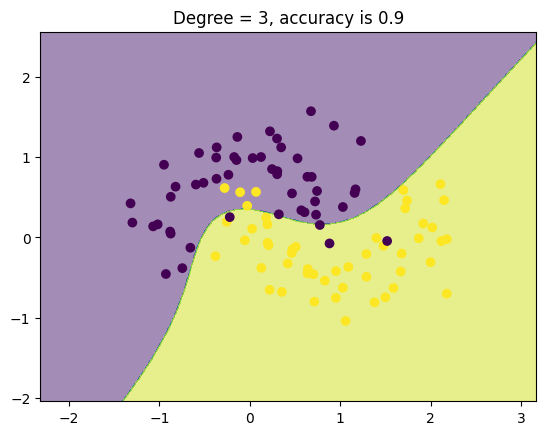

In [27]:
plot_decision_boundary(X,y,degree=3)

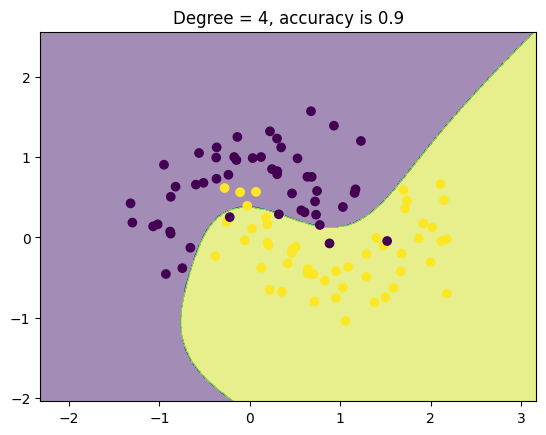

In [28]:
plot_decision_boundary(X,y,degree=4)

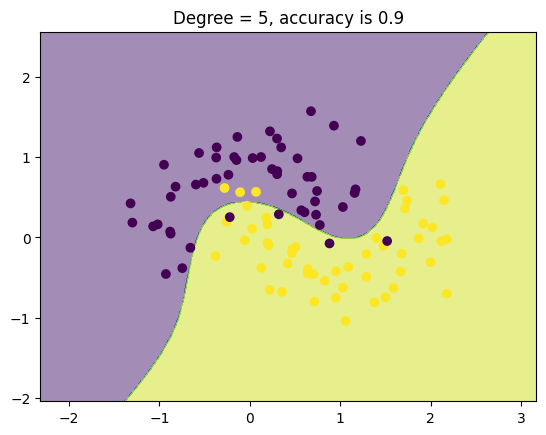

In [29]:
plot_decision_boundary(X,y,degree=5)

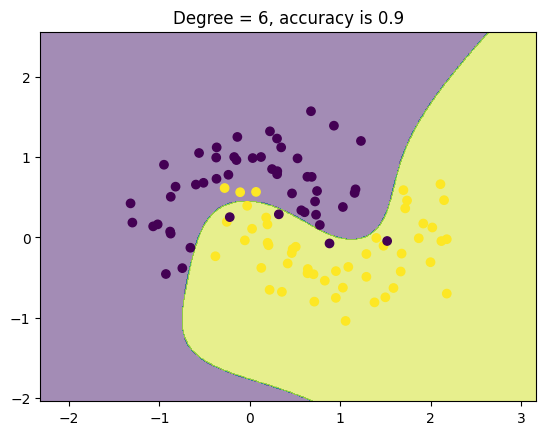

In [30]:
plot_decision_boundary(X,y,degree=6)

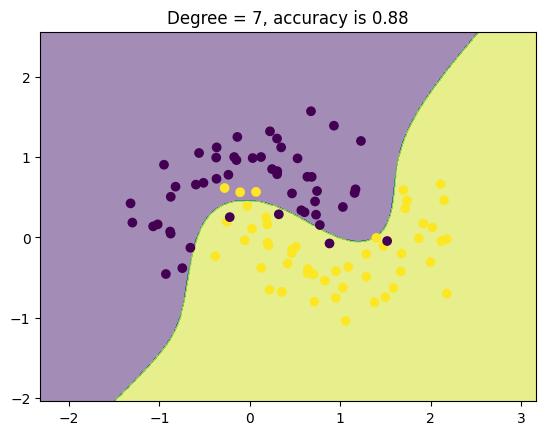

In [31]:
plot_decision_boundary(X,y,degree=7)

e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Skill\5. DataScience\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

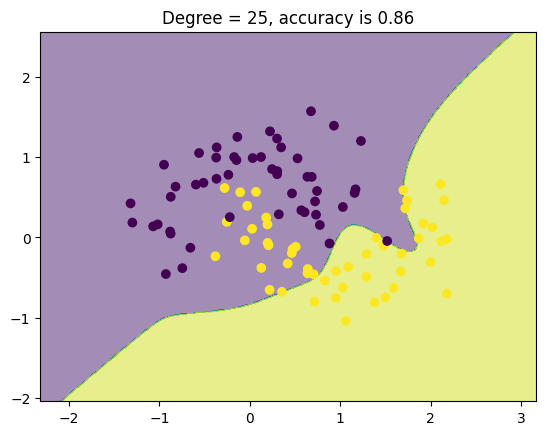

In [32]:
plot_decision_boundary(X,y,degree=25)